In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


In [17]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import roc_curve, auc
%matplotlib inline

Print 5 random normal images

Print 5 random pneumonia images

In [3]:
folder='\\train'

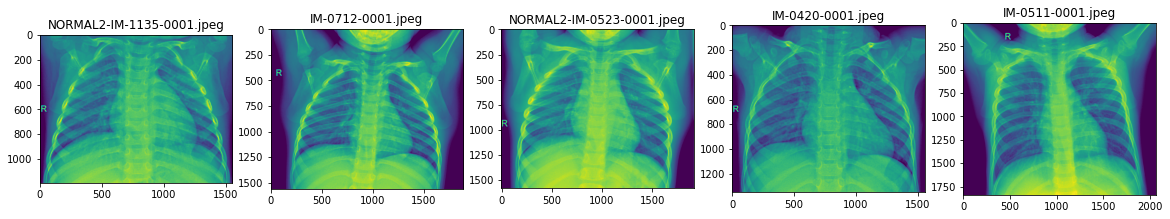

In [4]:
plt.figure(figsize=(20,20))
test_folder=r'..\chest_xray'+folder+r'\NORMAL'
for i in range(5):
    file = np.random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

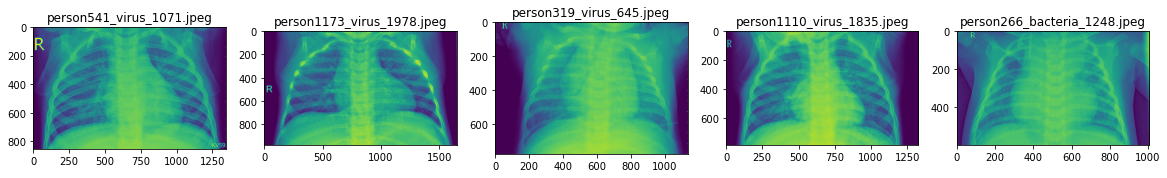

In [5]:
plt.figure(figsize=(20,20))
test_folder=r'..\chest_xray'+folder+r'\PNEUMONIA'
for i in range(5):
    file = np.random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [6]:
batch_size = 32
img_height = 180
img_width = 180
img_folder='..\chest_xray'+folder
print(img_folder)

..\chest_xray\train


In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  img_folder,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  img_folder,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5216 files belonging to 2 classes.
Using 1043 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


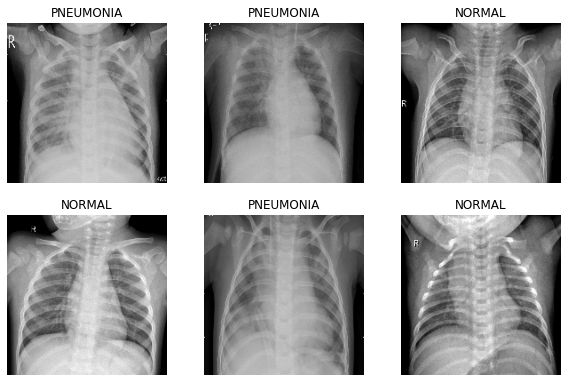

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [20]:
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [23]:
num_classes = 2

model = Sequential([
  data_augmentation,
  keras.layers.experimental.preprocessing.Rescaling(1./255),
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes)
])

In [24]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [25]:
epochs=10
history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 76s 583ms/step - loss: 0.8049 - sparse_categorical_accuracy: 0.7283 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.7766
Epoch 2/10
131/131 [==============================] - 79s 604ms/step - loss: 0.6931 - sparse_categorical_accuracy: 0.7345 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.7766
Epoch 3/10
131/131 [==============================] - 81s 616ms/step - loss: 0.6931 - sparse_categorical_accuracy: 0.7345 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.7766
Epoch 4/10
131/131 [==============================] - 80s 614ms/step - loss: 0.6931 - sparse_categorical_accuracy: 0.7345 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.7766
Epoch 5/10
131/131 [==============================] - 79s 607ms/step - loss: 0.6931 - sparse_categorical_accuracy: 0.7345 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.7766
Epoch 6/10
131/131 [==============================] - 80s 610ms/step - loss: 0.6931 -

<AxesSubplot:>

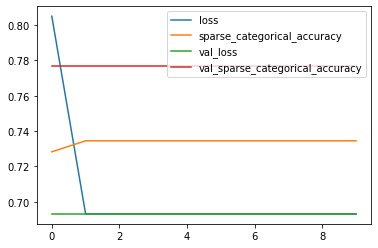

In [26]:
his=pd.DataFrame(history.history)
his.plot()

In [27]:
history.history['sparse_categorical_accuracy']

[0.7282530665397644,
 0.7344835996627808,
 0.7344835996627808,
 0.7344835996627808,
 0.7344835996627808,
 0.7344835996627808,
 0.7344835996627808,
 0.7344835996627808,
 0.7344835996627808,
 0.7344835996627808]

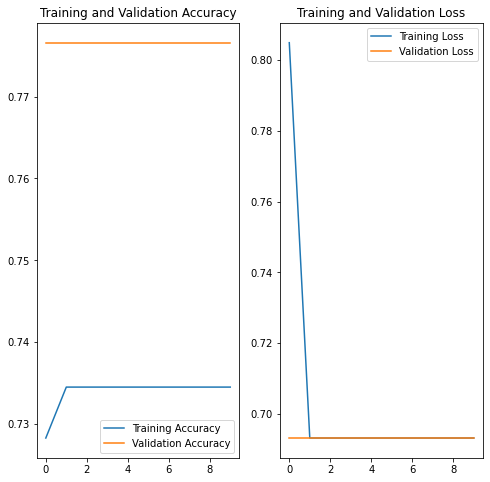

In [28]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
img = keras.preprocessing.image.load_img(
     r'..\chest_xray\test\NORMAL\IM-0001-0001.jpeg', target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to PNEUMONIA with a 99.87 percent confidence.


In [41]:
def predict(path):
    img = keras.preprocessing.image.load_img(
     path, target_size=(img_height, img_width))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    return(class_names[np.argmax(score)], 100 * np.max(score))

In [42]:
norm=os.listdir(r'..\chest_xray\test\NORMAL')
del norm[0]
pneum=os.listdir(r'..\chest_xray\test\PNEUMONIA')
del pneum[0]
pneum[:5]
tot=norm+pneum

In [43]:
results=pd.DataFrame(columns=['Path','Image No','Actual','Predicted'])
results['Image No']=tot
results.loc[results['Image No'].str.contains("IM"),['Actual']]=r'\NORMAL'
results.loc[results['Image No'].str.contains("person"),['Actual']]=r'\PNEUMONIA'
results['Path']=r'..\chest_xray\test'+results['Actual']+r"\\"+results['Image No']
results.head()

,Path,Image No,Actual,Predicted
0,..\chest_xray\test\NORMAL\\IM-0003-0001.jpeg,IM-0003-0001.jpeg,\NORMAL,NaN
1,..\chest_xray\test\NORMAL\\IM-0005-0001.jpeg,IM-0005-0001.jpeg,\NORMAL,NaN
2,..\chest_xray\test\NORMAL\\IM-0006-0001.jpeg,IM-0006-0001.jpeg,\NORMAL,NaN
3,..\chest_xray\test\NORMAL\\IM-0007-0001.jpeg,IM-0007-0001.jpeg,\NORMAL,NaN
4,..\chest_xray\test\NORMAL\\IM-0009-0001.jpeg,IM-0009-0001.jpeg,\NORMAL,NaN


In [45]:
results['Predicted']=results['Path'].apply(lambda x: predict(x)[0])
results['Prob']=results['Path'].apply(lambda x: predict(x)[1])


In [46]:
results.head()

,Path,Image No,Actual,Predicted,Prob
0,..\chest_xray\test\NORMAL\\IM-0003-0001.jpeg,IM-0003-0001.jpeg,\NORMAL,PNEUMONIA,99.877328
1,..\chest_xray\test\NORMAL\\IM-0005-0001.jpeg,IM-0005-0001.jpeg,\NORMAL,PNEUMONIA,99.935788
2,..\chest_xray\test\NORMAL\\IM-0006-0001.jpeg,IM-0006-0001.jpeg,\NORMAL,PNEUMONIA,99.967039
3,..\chest_xray\test\NORMAL\\IM-0007-0001.jpeg,IM-0007-0001.jpeg,\NORMAL,PNEUMONIA,99.944228
4,..\chest_xray\test\NORMAL\\IM-0009-0001.jpeg,IM-0009-0001.jpeg,\NORMAL,PNEUMONIA,99.934286


# i know this is incorrect to apply the auc on the full data rather than the test set but will be fixed in future releases

In [49]:
y=results.Predicted
y_prob=results.Prob

In [40]:
# Classification Accuracy Measures

# Packages for classification accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
%matplotlib inline

# The following method determines and presents the following accuracy measures:
# Confusion Matrix
# Accuracy
# Precision
# Recall
# F1-score
# ROC
# AUC of ROC
def ClassificationAccuracy(actualTestOutcomes, predicted_probabilities, ClassThreshold = 0.5, title = ""):
    # Thresholded Accuracy Measures
    
    predicted_classes = 1*(predicted_probabilities > ClassThreshold)
    cm = confusion_matrix(actualTestOutcomes, predicted_classes)
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn)/(tn + fp + fn + tp)
    precision, recall, fscore, support = precision_recall_fscore_support(actualTestOutcomes, predicted_classes)
    ConfusionPresent = (
        '                       Red  White\n' +
        'predict Red:     ' + str(tp) + "       " + str(fp) + "\n" + 
        'predict White:     ' + str(fn) + "       " + str(tn))
    accuracyMetrics = (
        "\nAccuracy: %0.6f" % accuracy +
        "\nPrecision: %0.6f" % precision[1] + 
        "\nRecall: %0.6f" % recall[1] + 
        "\nF1-score: %0.6f" % fscore[1])
    
    # ROC
    fpr, tpr, probability_thresholds = roc_curve(actualTestOutcomes, predicted_probabilities)
    AUC_metric = auc(fpr, tpr)

    plt.rcParams["figure.figsize"] = [6, 4]
    plt.figure()
    plt.title('Classification Accuracies  ' + title)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot(fpr, tpr, LW=3, label='ROC curve (AUC = %0.6f)' % AUC_metric)
    plt.legend(loc="lower center")
    plt.plot([0, 1], [0, 1], color='navy', LW=3, linestyle='--') # reference line for random classifier
    #plt.text(x=0.1, y=0.0, s="AUC: %0.2f" % AUC_metric)
    plt.text(x=0.70, y=0.45, s=accuracyMetrics)
    plt.text(x=0.45, y=0.2, s=ConfusionPresent)
    plt.show()
    return None

# TrainAndTestWrapper combines model training and model testing
def TrainAndTestWrapper(model, X_train, y_train, X_test, y_test, title=""):
    model.fit(X_train, y_train) 
    test_probabilities = model.predict_proba(X_test)[:,1]
    ClassificationAccuracy(y_test, test_probabilities, title=title)

In [52]:
ClassificationAccuracy(y, y_prob, title='Rough AUC')

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['PNEUMONIA'] and y_pred=[1]. Make sure that the predictions provided by the classifier coincides with the true labels.